In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

from sklearn import datasetss

In [3]:
digits = datasets.load_digits()

In [8]:
data = digits.data
target = digits.target
target_names = digits.target_names
images = digits.images

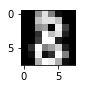

In [21]:
# 像素的特征数是像素的乘积
# 如果像素很高需要降维处理
plt.figure(figsize=(1,1))
index = 8
s = plt.imshow(images[index], cmap="gray")

In [25]:
images.shape,data.shape

((1797, 8, 8), (1797, 64))

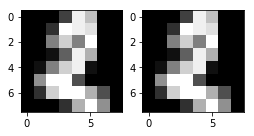

In [28]:

# 机器学习使用 data, 展示数据使用 images
plt.figure(figsize=(4,4))
index = 2

axes1 = plt.subplot(121)
axes1.imshow(data[index].reshape(8,8), cmap="gray")

axes2 = plt.subplot(122)
axes2.imshow(images[index], cmap="gray")

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [43]:
# 拆分数据, random_state 保证取值的内容和比例是完全一致的
X_train, X_test, y_train, y_test = train_test_split(
    data,target,test_size=0.1,random_state=1)

In [66]:
logistic = LogisticRegression(C=0.001)
knn = KNeighborsClassifier(n_neighbors=35)

logistic.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')

In [67]:
y1_ = logistic.predict(X_test)
y2_ = knn.predict(X_test)

In [68]:
score1 = logistic.score(X_test, y_test)
score2 = knn.score(X_test, y_test)
print(score1, '\n', score2)
logistic.score(X_train, y_train), knn.score(X_train, y_train)

0.9666666666666667 
 0.9888888888888889


(0.9635126777983921, 0.9666048237476809)

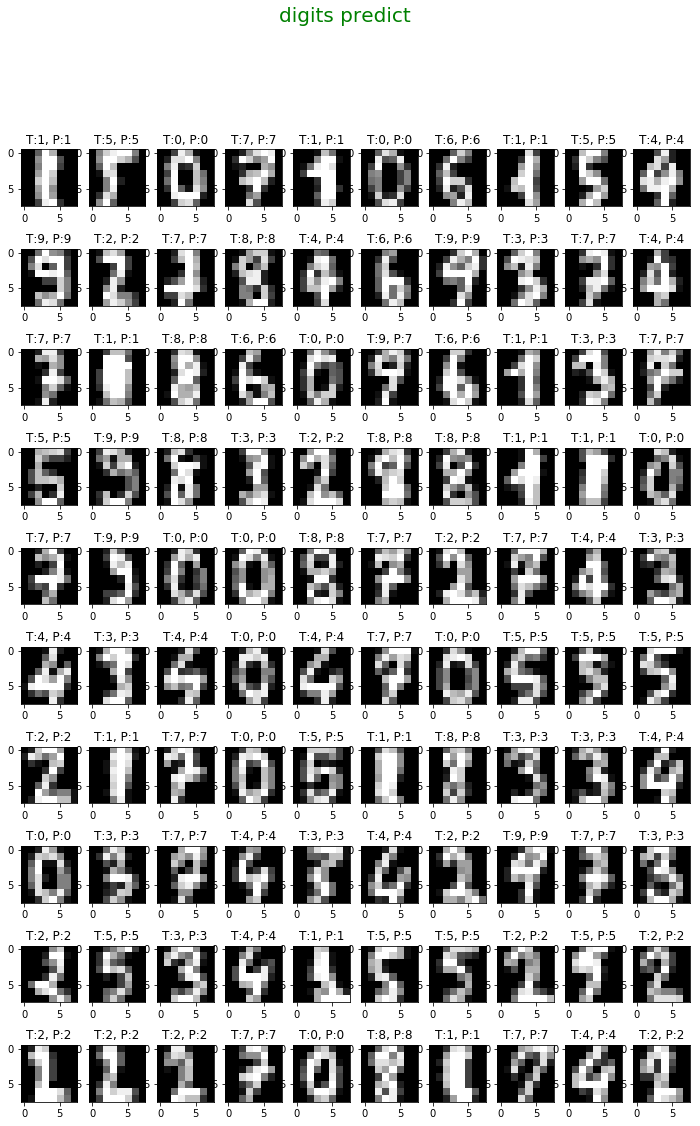

In [94]:
# 展示结果  展示前 100 预测数据

figure = plt.figure(figsize=(12, 18))
figure.suptitle("digits predict" ,fontsize=20, color="g")

# 画布位置
for index in range(100):
    axes = plt.subplot(10, 10, index+1)
    test_data = X_test[index]

    title = "T:{}, P:{}".format(y_test[index],y2_[index])
    axes.set_title(label=title)
    axes.imshow(test_data.reshape((8,8)), cmap="gray")
        
